# Question1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [4]:
import requests
from io import StringIO 
import pandas as pd
#step1 nd 2 and 3
#https://stackoverflow.com/questions/39213597/convert-text-data-from-requests-object-to-dataframe-with-pandas
#https://stackoverflow.com/questions/773/how-do-i-use-itertools-groupby
users = requests.get('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user')
temp = users.text.split("\n")
keyArr = []
data = []
for i,temp1 in enumerate(temp):
    temp2 = temp1.split("|")
    if i == 0:
        for key in temp2:
            keyArr.append(key)  
    else:  
        data.append(temp2)
# step4
df = pd.DataFrame(data, columns = keyArr)

df["age"] = pd.to_numeric(df["age"])
print(df)
dff = df.groupby('occupation', as_index=False)['age'].mean()
print("Mean age per occupation")
print(dff)

#step6
dff2 = df.groupby('occupation', as_index=False)['age'].min()
dff3 = df.groupby('occupation', as_index=False)['age'].max()
print("min age per occupation")
print(dff2)
print("max age per occupation")
print(dff3)

#step7

dff4 = df.groupby(['occupation','gender'], as_index=False)['age'].mean()
print("combination of occupation and sex the mean age")
print(dff4)

#step8

dff5 = df.groupby('occupation')['gender'].value_counts(normalize=True).mul(100)
print("occupation present the percentage of women and men")
print(dff5)

    user_id   age gender     occupation zip_code
0         1  24.0      M     technician    85711
1         2  53.0      F          other    94043
2         3  23.0      M         writer    32067
3         4  24.0      M     technician    43537
4         5  33.0      F          other    15213
..      ...   ...    ...            ...      ...
939     940  32.0      M  administrator    02215
940     941  20.0      M        student    97229
941     942  48.0      F      librarian    78209
942     943  22.0      M        student    77841
943           NaN   None           None     None

[944 rows x 5 columns]
Mean age per occupation
       occupation        age
0   administrator  38.746835
1          artist  31.392857
2          doctor  43.571429
3        educator  42.010526
4        engineer  36.388060
5   entertainment  29.222222
6       executive  38.718750
7      healthcare  41.562500
8       homemaker  32.571429
9          lawyer  36.750000
10      librarian  40.000000
11      marketin

# Question2
Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team

In [3]:
import requests
from io import StringIO 
import pandas as pd

#https://realpython.com/pandas-groupby/
euro12 = requests.get('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

temp = euro12.text.split("\n")
keyArr = []
data = []
for i,temp1 in enumerate(temp):
    temp2 = temp1.split(",")
    if i == 0:
        for key in temp2:
            keyArr.append(key)  
    else:  
        data.append(temp2)

df = pd.DataFrame(data, columns = keyArr)
print(df)

#Step 4
print(df['Goals'])

#Step 5
print(df.shape[0])

#Step 6
print(df.shape[1])

#Step 7
discipline = df[['Team', 'Yellow Cards','Red Cards']]
print(discipline)

#Step 8
dfSort = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False,False])
print(dfSort)

#Step 9
discipline["Yellow Cards"] = pd.to_numeric(discipline["Yellow Cards"])
print("mean Yellow Cards given per Team")
dfMeanYellowCard = discipline.groupby('Team', as_index=False)['Yellow Cards'].mean()
print(dfMeanYellowCard)

#Step11

temp = df['Team'].astype(str).str.startswith('G')
print(temp)

#Step 12
dff=df.iloc[:, list(range(6)) + [-1]]
print(dff)

#Step 13
dff1=df.iloc[:, list(range(df.shape[1])) + [-3]]
print(dff1)

                   Team Goals Shots on target Shots off target  \
0               Croatia     4              13               12   
1        Czech Republic     4              13               18   
2               Denmark     4              10               10   
3               England     5              11               18   
4                France     3              22               24   
5               Germany    10              32               32   
6                Greece     5               8               18   
7                 Italy     6              34               45   
8           Netherlands     2              12               36   
9                Poland     2              15               23   
10             Portugal     6              22               42   
11  Republic of Ireland     1               7               12   
12               Russia     5               9               31   
13                Spain    12              42               33   
14        

<ipython-input-3-58ebf1dcfa24>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discipline["Yellow Cards"] = pd.to_numeric(discipline["Yellow Cards"])


# Question3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 different Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [4]:
#step1
import pandas as pd
import numpy as np
Team = requests.get('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
Team

# my response is not shows thats why i can not perform further operation

<Response [200]>

# Question4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [74]:
#https://stackoverflow.com/questions/51352069/i-want-to-write-to-a-dat-file-with-sep-s-using-python
# step 1 and 2
import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', sep='\s+')
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [75]:
#step 3
data_indexes = data.set_index('Yr')
data_indexes

,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr,,,,,,,,,,,,,,
61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [84]:
#step7
data.notnull().sum()

Yr     6574
Mo     6574
Dy     6574
RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [85]:
#step8
data.mean()

Yr     69.500304
Mo      6.523274
Dy     15.728628
RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

In [102]:
#step9
loc_stats= pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', sep='\s+')
loc_stats
#
loc_stats.mean()

Yr     69.500304
Mo      6.523274
Dy     15.728628
RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

In [103]:
loc_stats.max()

Yr     78.00
Mo     12.00
Dy     31.00
RPT    35.80
VAL    33.37
ROS    33.84
KIL    28.46
SHA    37.54
BIR    26.16
DUB    30.37
CLA    31.08
MUL    25.88
CLO    28.21
BEL    42.38
MAL    42.54
dtype: float64

In [106]:
loc_stats.min()

Yr     61.00
Mo      1.00
Dy      1.00
RPT     0.67
VAL     0.21
ROS     1.50
KIL     0.00
SHA     0.13
BIR     0.00
DUB     0.00
CLA     0.00
MUL     0.00
CLO     0.04
BEL     0.13
MAL     0.67
dtype: float64

In [105]:
loc_stats.std()

Yr     5.188131
Mo     3.448871
Dy     8.800335
RPT    5.618413
VAL    5.267356
ROS    5.008450
KIL    3.605811
SHA    4.936125
BIR    3.968683
DUB    4.977555
CLA    4.499449
MUL    4.166872
CLO    4.503954
BEL    5.835037
MAL    6.699794
dtype: float64

In [107]:
#step 10
day_stats = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', sep='\s+')
day_stats

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [125]:
day_stats.mean(axis=1)

0       14.728571
1       13.478571
2       13.790000
3        9.695333
4       12.970667
          ...    
6569    21.166667
6570    19.986667
6571    19.845333
6572    20.294000
6573    20.388667
Length: 6574, dtype: float64

In [126]:
day_stats.max(axis=1)

0       61.0
1       61.0
2       61.0
3       61.0
4       61.0
        ... 
6569    78.0
6570    78.0
6571    78.0
6572    78.0
6573    78.0
Length: 6574, dtype: float64

In [122]:
day_stats.min(axis=1)

0       1.00
1       1.00
2       1.00
3       1.00
4       1.00
        ... 
6569    8.08
6570    5.00
6571    8.71
6572    9.13
6573    9.59
Length: 6574, dtype: float64

In [123]:
day_stats.std(axis=1)

0       14.220976
1       14.406022
2       14.398500
3       14.555991
4       13.745564
          ...    
6569    17.459293
6570    18.529258
6571    17.292730
6572    17.158682
6573    17.233853
Length: 6574, dtype: float64

In [117]:
#step11
dataJan = data[data.Mo == 1]
dataJan


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,78,1,27,18.54,9.59,15.67,6.42,10.34,7.04,11.63,9.38,9.46,7.58,11.42,24.87
6236,78,1,28,35.38,29.88,18.00,15.96,26.92,15.67,15.87,26.34,15.04,17.75,34.42,35.83
6237,78,1,29,29.38,18.54,28.08,17.12,17.50,13.75,25.54,15.67,18.08,20.50,19.12,38.20
6238,78,1,30,9.62,8.71,9.59,2.71,7.58,3.54,6.08,6.08,5.33,4.46,10.41,12.83


In [130]:
#https://stackoverflow.com/questions/43478822/resample-python-list-with-pandas
#step12
data.resample('Y').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [131]:
#step13
data.resample('M').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [132]:
#step14
data.resample('W').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [135]:
#step15
day_stats.std(axis=0)

Yr     5.188131
Mo     3.448871
Dy     8.800335
RPT    5.618413
VAL    5.267356
ROS    5.008450
KIL    3.605811
SHA    4.936125
BIR    3.968683
DUB    4.977555
CLA    4.499449
MUL    4.166872
CLO    4.503954
BEL    5.835037
MAL    6.699794
dtype: float64

# Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [68]:
#step 1,2,3 and 4
import pandas as pd
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [43]:
#step 5
chipo.shape[0]

4622

In [44]:
#step 6
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [45]:
#step 5
chipo.count()

order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

In [46]:
#step 6
len(chipo.columns)

5

In [47]:
#step 7
print(chipo.columns.tolist())

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [48]:
#step 8
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [49]:
#step 9
chipomostsell = chipo.groupby('item_name')
chipomostsell = chipomostsell.sum()
chipomostsell = chipomostsell.sort_values(['quantity'], ascending=False)
chipomostsell
chipomostsell.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [50]:
#step 10
chipomostordered = chipo.groupby('item_name')
chipomostordered = chipomostordered.sum()
chipomostordered = chipomostordered.sort_values(['quantity'], ascending=False)
chipomostordered
chipomostordered.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [51]:
#step 11
choicechipo = chipo.groupby('choice_description').sum()
choicechipo = choicechipo.sort_values(['quantity'], ascending=False)
choicechipo
choicechipo.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [52]:
#step 12
items = chipo.quantity.sum()
items

4972

In [53]:
#step13
chipo.item_price.dtype

dtype('O')

In [62]:
#https://datatofish.com/convert-string-to-float-dataframe/
chipo['item_price'] = chipo['item_price'].astype(float)

ValueError: could not convert string to float: '$2.39 '

In [55]:
chipo.item_price.dtype

dtype('O')

In [57]:
#step 15
totalorder = chipo.order_id.value_counts().count()
totalorder

1834

In [59]:
#step16
chipo.groupby(by=['order_id']).sum().mean()

quantity    2.711014
dtype: float64

In [60]:
#step17
chipo.item_name.value_counts().count()

50

# Question6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

<ipython-input-191-e871d89955cc>:9: UserWarning: Legend does not support 'Year' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax.legend(["Year"],["Divorces"])


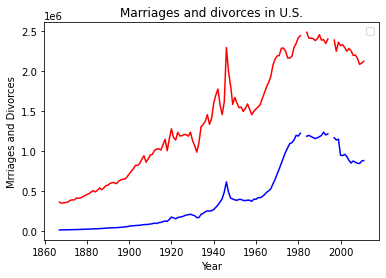

In [191]:
#https://medium.com/intel-student-ambassadors/live-graph-simulation-using-python-matplotlib-and-pandas-30ea4e50f883
import matplotlib.pyplot as plt 
UsMarrigeDetail = pd.read_csv('C:\\JalpaAll\\DataPrograming\\ProblemSet3\\us-marriages-divorces-1867-2014.csv')
ax =plt.gca()
UsMarrigeDetail.plot(kind='line',x='Year',y = 'Marriages',ax=ax,color='red')
UsMarrigeDetail.plot(kind='line',x='Year',y = 'Divorces',ax=ax,color='blue')
ax.set_xlabel("Year")
ax.set_ylabel("Mrriages and Divorces")
ax.legend(["Year"],["Divorces"])
plt.title('Marriages and divorces in U.S.')
plt.show()

# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

Text(0.5, 1.0, 'Marriages in the U.S.')

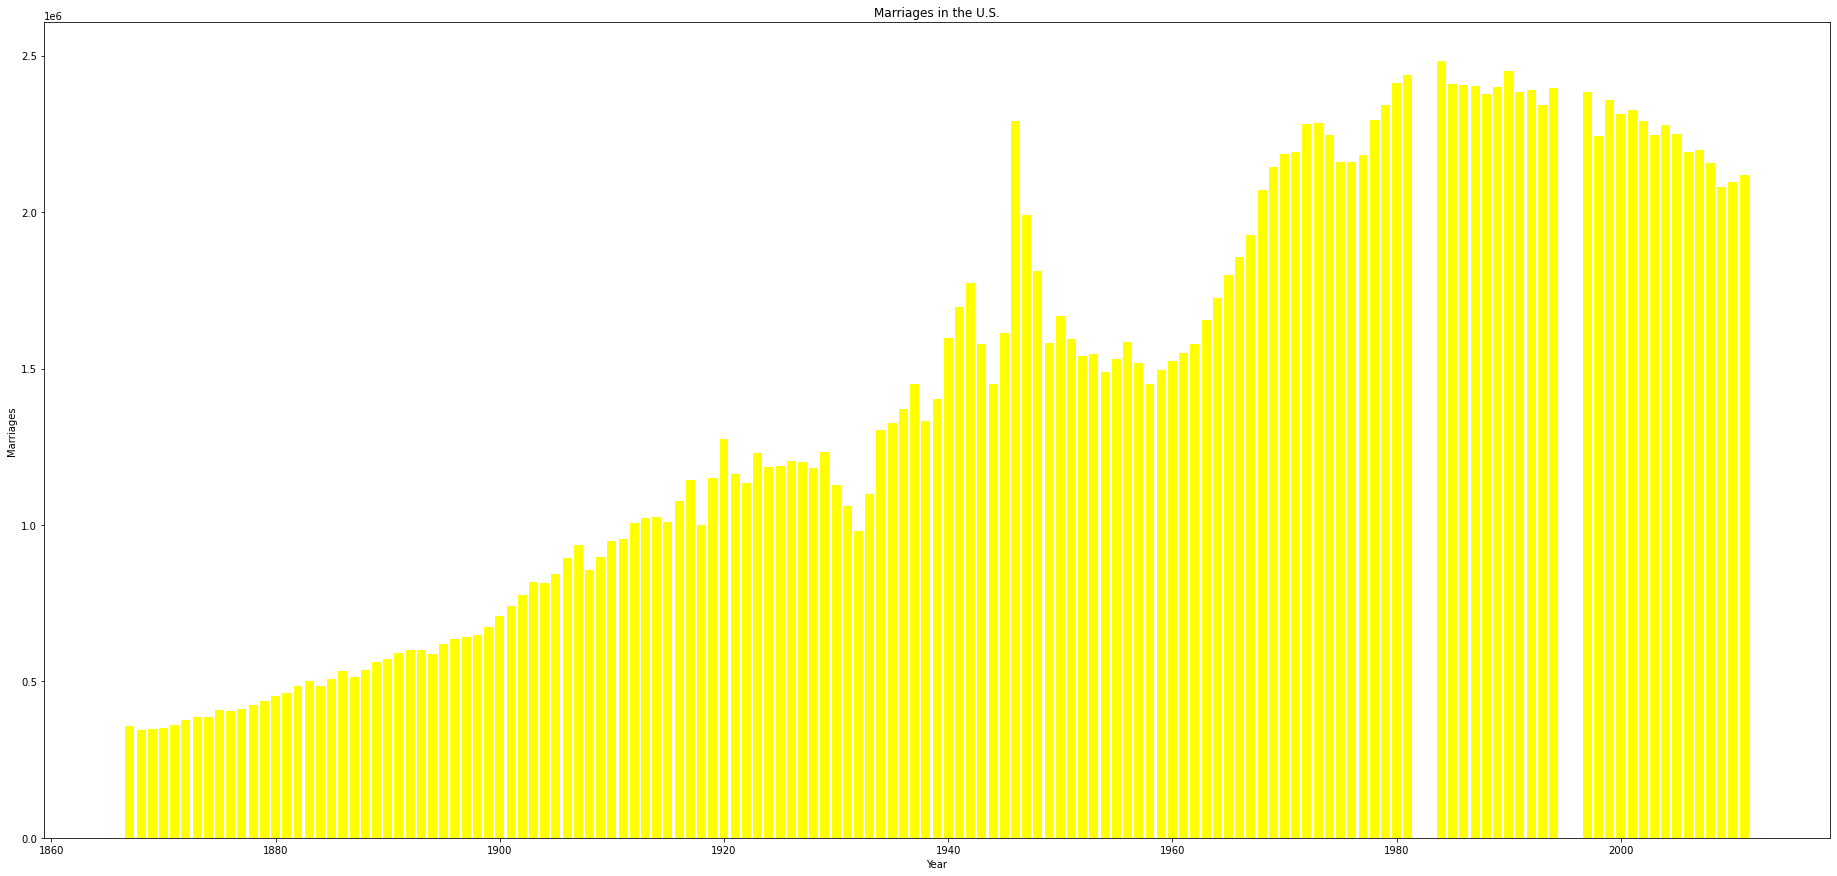

In [184]:
# from Rick Lambroff Manipulation Lecture
import matplotlib.pyplot as plt 
UsMarrigeDetail = pd.read_csv('C:\\JalpaAll\\DataPrograming\\ProblemSet3\\us-marriages-divorces-1867-2014.csv')
plt.figure(figsize = (32, 15))
plt.bar(x =UsMarrigeDetail['Year'],
       height = UsMarrigeDetail['Marriages'],
       color = 'Yellow')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Marriages', fontsize= 10);
plt.title('Marriages in the U.S.')

# Question8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!


Text(0, 0.5, 'Actor')

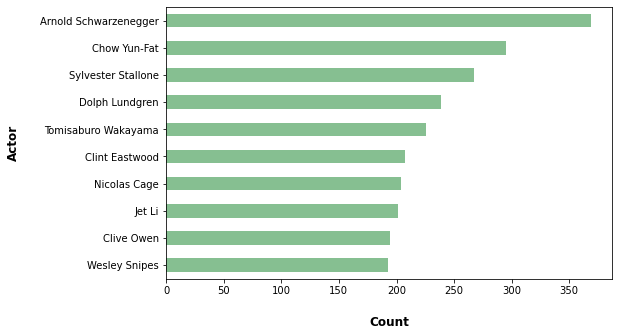

In [183]:
actorKillCounts = pd.read_csv('C:\\JalpaAll\\DataPrograming\\ProblemSet3\\actor_kill_counts.csv')
#https://mode.com/example-gallery/python_horizontal_bar/
actor= actorKillCounts.groupby('Actor')['Count'].mean().sort_values()
actor = actor.plot(kind='barh', figsize=(8, 5), color='#86bf91', zorder=2, width=0.50)
actor.set_xlabel("Count", labelpad=20, weight='bold', size=12)
actor.set_ylabel("Actor", labelpad=20, weight='bold', size=12)



# Question9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.



<AxesSubplot:ylabel='Length_of_Reign'>

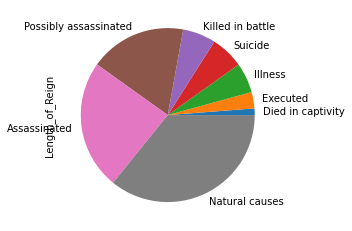

In [170]:
#https://stackoverflow.com/questions/56294597/how-to-create-a-pie-chart-from-csv-file-using-python
romanEmp = pd.read_csv('C:\\JalpaAll\\DataPrograming\\ProblemSet3\\roman-emperor-reigns.csv')
romanEmp = romanEmp.groupby('Cause_of_Death')['Length_of_Reign'].sum().sort_values()
romanEmp.plot(kind='pie')

# Question10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

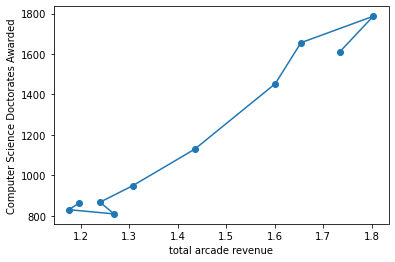

In [175]:
#https://ourcodingclub.github.io/tutorials/pandas-python-intro/
arcadeRevenue = pd.read_csv('C:\\JalpaAll\\DataPrograming\\ProblemSet3\\arcade-revenue-vs-cs-doctorates.csv')

x = arcadeRevenue['Total Arcade Revenue (billions)']
y = arcadeRevenue['Computer Science Doctorates Awarded (US)']

plt.scatter(x, y)
plt.plot(x,y, label='Arcade revenue vs Phd Awarded')
plt.xlabel('total arcade revenue')
plt.ylabel('Computer Science Doctorates Awarded')
plt.show()